# Month TweetsAnalysis 

# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import sys
import os
import datetime
from datetime import timedelta
import re
import string
from textblob import TextBlob
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Create Cleaning Functions

In [7]:
# Create a function that perform tweet pre-processing
def preprocess_tweet(row):
    
    text = row['tweet']
    text = p.clean(text) 
    #clean to normal text removes hashtags and emojis
    text = re.sub(r'[^\w]', '', text) #Removes all symbols
    text = text.lower() # lowercases all words
    text = re.sub(r'\d+', '', text) # Removes numbers
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text = remove_stopwords(text) #removes stopwords
    text = re.sub(r'\W*\b\w{1,2}\b', '', text) 
    
    return text

In [8]:
# Create a function that clean the dataframe
def cleanTwt(twt):
    
    twt = twt.lower()
    
    twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the hashtag from bitcoin
    twt = re.sub('#Bitcoin', 'bitcoin', twt) #removes the hashtag from Bitcoin
    twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with the hashtag
    twt = re.sub('\\n', '', twt) #removes the \n in charachter 
    twt = re.sub('https?:\/\/\S+', '' ,twt) #removes hyperlinks
    twt = re.sub('\[.*?\]', '', twt)
    twt = re.sub('[%s]' % re.escape(string.punctuation), '', twt)
    twt = re.sub('\w*\d\w*', '', twt)  
    twt = re.sub('[‘’“”…]', '', twt)   
    twt = re.sub('\n', ' ', twt)   
   

    # Remove stop_word
    stop_words = stopwords.words('english')
    words = word_tokenize(twt)
    
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
            
    return twt

In [9]:
wnl = WordNetLemmatizer()

# Create a function to perform lemmatization
def lemmatize_tag(text):
    
    lemma=[]
    for i,j in pos_tag(word_tokenize(text)) :
        p=j[0].lower()
        if p in ['j','n','v']:
            if p == 'j':
                p = 'a'
            lemma.append(wnl.lemmatize(i,p))
        else :
            lemma.append(wnl.lemmatize(i))    
    
    return ' '.join(lemma)


# Bitcoin

### February

In [10]:
#import the dataset of February
df1 = pd.read_csv("bitcoin_january.csv")

In [11]:
df1

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/ConorDouglas_/status/13658...,2021-02-27 23:59:51+00:00,I just joined this $25k Crypto giveaway by @JR...,I just joined this $25k Crypto giveaway by @JR...,1365813931915177984,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['Bitcoin', 'Crypto']","['BTC', 'ETH', 'SRK']"
1,snscrape.modules.twitter.Tweet,https://twitter.com/CryptoWatchBot/status/1365...,2021-02-27 23:59:50+00:00,#Investing 64.4% in this optimal #crypto portf...,#Investing 64.4% in this optimal #crypto portf...,1365813927179862028,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Investing', 'crypto', 'cash', 'Bitcoin', 'ri...",NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/DigitalLawrence/status/136...,2021-02-27 23:59:36+00:00,#Bitcoin either goes up or down from here.,#Bitcoin either goes up or down from here.,1365813867729678336,"{'_type': 'snscrape.modules.twitter.User', 'us...",8,1,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Bitcoin'],NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/xyzmenno/status/1365813861...,2021-02-27 23:59:34+00:00,I just joined this $25k Crypto giveaway by @JR...,I just joined this $25k Crypto giveaway by @JR...,1365813861711040515,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['Bitcoin', 'Crypto']","['BTC', 'ETH', 'SRK']"
4,snscrape.modules.twitter.Tweet,https://twitter.com/NathanMars7/status/1365813...,2021-02-27 23:59:34+00:00,Let’s go $HIVE 🚀🚀🚀\n\n#Bitcoin : Decentralised...,Let’s go $HIVE 🚀🚀🚀\n\n#Bitcoin : Decentralised...,1365813858376499201,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,"['Bitcoin', 'HIVE']",['HIVE']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,snscrape.modules.twitter.Tweet,https://twitter.com/YasinCa50886165/status/136...,2021-02-20 01:33:37+00:00,"#RollerCoin Minning , güvenilir, hızlı, ücrets...","#RollerCoin Minning , güvenilir, hızlı, ücrets...",1362938423695278081,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['RollerCoin', 'Bitcoin', 'bitcoinmining']",NaN
299996,snscrape.modules.twitter.Tweet,https://twitter.com/theaussietradr/status/1362...,2021-02-20 01:33:32+00:00,ETHBTC pairing not looking great. Need to hold...,ETHBTC pairing not looking great. Need to hold...,1362938402895667201,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Bitcoin', 'ethereum']",NaN
299997,snscrape.modules.twitter.Tweet,https://twitter.com/taigirtruong/status/136293...,2021-02-20 01:33:31+00:00,@PeterSchiff @elonmusk Stop shilling #bitcoin ...,@PeterSchiff @elonmusk Stop shilling #bitcoin ...,1362938402409115655,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,1.362790e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['bitcoin'],NaN
299998,snscrape.modules.twitter.Tweet,https://twitter.com/DarthCrypto8/status/136293...,2021-02-20 01:33:29+00:00,#Bitcoin https://t.co/ji4iELVZ4k,#Bitcoin https://t.co/ji4iELVZ4k,1362938393689133057,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Bitcoin'],NaN


In [12]:
df1.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')

## Preprocess

In [13]:
#drop some useless columns
df1 = df1.drop(['_type', 'url', 'renderedContent', 'user',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'], axis = 1)

In [14]:
df1.rename(columns={'id': 'Tweet Id'}, inplace=True)
df1.rename(columns={'content': 'Tweet'}, inplace=True)
df1

,date,Tweet,Tweet Id,replyCount,retweetCount,likeCount,quoteCount
0,2021-02-27 23:59:51+00:00,I just joined this $25k Crypto giveaway by @JR...,1365813931915177984,0,0,0,0
1,2021-02-27 23:59:50+00:00,#Investing 64.4% in this optimal #crypto portf...,1365813927179862028,0,0,0,0
2,2021-02-27 23:59:36+00:00,#Bitcoin either goes up or down from here.,1365813867729678336,8,1,30,1
3,2021-02-27 23:59:34+00:00,I just joined this $25k Crypto giveaway by @JR...,1365813861711040515,0,0,0,0
4,2021-02-27 23:59:34+00:00,Let’s go $HIVE 🚀🚀🚀\n\n#Bitcoin : Decentralised...,1365813858376499201,0,2,4,0
...,...,...,...,...,...,...,...
299995,2021-02-20 01:33:37+00:00,"#RollerCoin Minning , güvenilir, hızlı, ücrets...",1362938423695278081,0,0,1,0
299996,2021-02-20 01:33:32+00:00,ETHBTC pairing not looking great. Need to hold...,1362938402895667201,0,0,0,0
299997,2021-02-20 01:33:31+00:00,@PeterSchiff @elonmusk Stop shilling #bitcoin ...,1362938402409115655,0,0,0,0
299998,2021-02-20 01:33:29+00:00,#Bitcoin https://t.co/ji4iELVZ4k,1362938393689133057,0,0,0,0


## Cleaning

In [15]:
# Clean the tweets
df1['Tweet'] = df1['Tweet'].apply(cleanTwt)

In [16]:
# Perform lemmatization to the tweets
df1['Tweet'] = pd.DataFrame(df1.Tweet.apply(lemmatize_tag))

In [17]:
df1

,date,Tweet,Tweet Id,replyCount,retweetCount,likeCount,quoteCount
0,2021-02-27 23:59:51+00:00,i just join this crypto giveaway by jrnycrypto...,1365813931915177984,0,0,0,0
1,2021-02-27 23:59:50+00:00,in this optimal portfolio and in the past hour...,1365813927179862028,0,0,0,0
2,2021-02-27 23:59:36+00:00,bitcoin either go up or down from here,1365813867729678336,8,1,30,1
3,2021-02-27 23:59:34+00:00,i just join this crypto giveaway by jrnycrypto...,1365813861711040515,0,0,0,0
4,2021-02-27 23:59:34+00:00,let go hive 🚀🚀🚀bitcoin decentralise money dece...,1365813858376499201,0,2,4,0
...,...,...,...,...,...,...,...
299995,2021-02-20 01:33:37+00:00,minning güvenilir hızlı ücretsiz tıkla katıl o...,1362938423695278081,0,0,1,0
299996,2021-02-20 01:33:32+00:00,ethbtc pair not look great need to hold this o...,1362938402895667201,0,0,0,0
299997,2021-02-20 01:33:31+00:00,peterschiff elonmusk stop shill bitcoin please,1362938402409115655,0,0,0,0
299998,2021-02-20 01:33:29+00:00,bitcoin,1362938393689133057,0,0,0,0


# Sentiment Analysis

In [18]:
# Function to get the subjectivity
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity
# Function to get the polarity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

#create a function to get the sentiment text
def getSentiment(score):
    if score < 0: 
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [19]:
#create two new columns: subjectivity and polarity 
df1['Subjectivity'] = df1['Tweet'].apply(getSubjectivity)
df1['Polarity'] = df1['Tweet'].apply(getPolarity)

In [20]:
df1

,date,Tweet,Tweet Id,replyCount,retweetCount,likeCount,quoteCount,Subjectivity,Polarity
0,2021-02-27 23:59:51+00:00,i just join this crypto giveaway by jrnycrypto...,1365813931915177984,0,0,0,0,0.300000,0.100000
1,2021-02-27 23:59:50+00:00,in this optimal portfolio and in the past hour...,1365813927179862028,0,0,0,0,0.187500,-0.125000
2,2021-02-27 23:59:36+00:00,bitcoin either go up or down from here,1365813867729678336,8,1,30,1,0.288889,-0.155556
3,2021-02-27 23:59:34+00:00,i just join this crypto giveaway by jrnycrypto...,1365813861711040515,0,0,0,0,0.300000,0.100000
4,2021-02-27 23:59:34+00:00,let go hive 🚀🚀🚀bitcoin decentralise money dece...,1365813858376499201,0,2,4,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
299995,2021-02-20 01:33:37+00:00,minning güvenilir hızlı ücretsiz tıkla katıl o...,1362938423695278081,0,0,1,0,0.000000,0.000000
299996,2021-02-20 01:33:32+00:00,ethbtc pair not look great need to hold this o...,1362938402895667201,0,0,0,0,0.625000,0.650000
299997,2021-02-20 01:33:31+00:00,peterschiff elonmusk stop shill bitcoin please,1362938402409115655,0,0,0,0,0.000000,0.000000
299998,2021-02-20 01:33:29+00:00,bitcoin,1362938393689133057,0,0,0,0,0.000000,0.000000


In [21]:
# Create a column to store the text sentiment
df1['Sentiment'] = df1['Polarity'].apply(getSentiment)
# Show the date
df1.head(5)

,date,Tweet,Tweet Id,replyCount,retweetCount,likeCount,quoteCount,Subjectivity,Polarity,Sentiment
0,2021-02-27 23:59:51+00:00,i just join this crypto giveaway by jrnycrypto...,1365813931915177984,0,0,0,0,0.300000,0.100000,Positive
1,2021-02-27 23:59:50+00:00,in this optimal portfolio and in the past hour...,1365813927179862028,0,0,0,0,0.187500,-0.125000,Negative
2,2021-02-27 23:59:36+00:00,bitcoin either go up or down from here,1365813867729678336,8,1,30,1,0.288889,-0.155556,Negative
3,2021-02-27 23:59:34+00:00,i just join this crypto giveaway by jrnycrypto...,1365813861711040515,0,0,0,0,0.300000,0.100000,Positive
4,2021-02-27 23:59:34+00:00,let go hive 🚀🚀🚀bitcoin decentralise money dece...,1365813858376499201,0,2,4,0,0.000000,0.000000,Neutral


### Some visualization

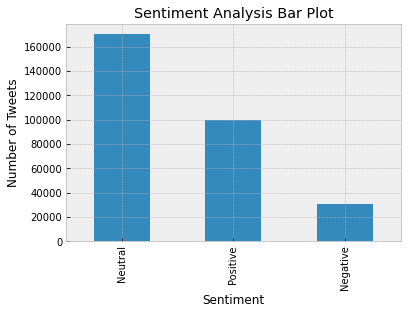

In [22]:
# Create a bar chart to show the count of positive, neutral and negative sentiments
plt.style.use(['bmh'])
from matplotlib.ticker import FuncFormatter

df1['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

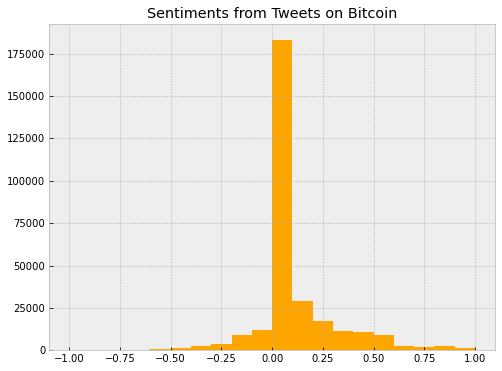

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
df1['Polarity'].hist(bins=[-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0],
             ax=ax,
             color="Orange")

plt.title("Sentiments from Tweets on Bitcoin")
plt.show()

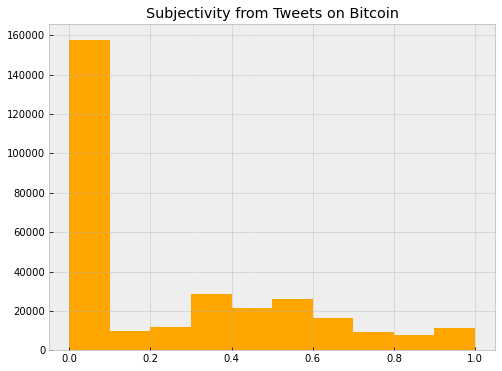

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
df1['Subjectivity'].hist(bins=[0.0, 0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0],
             ax=ax,
             color="Orange")

plt.title("Subjectivity from Tweets on Bitcoin")
plt.show()

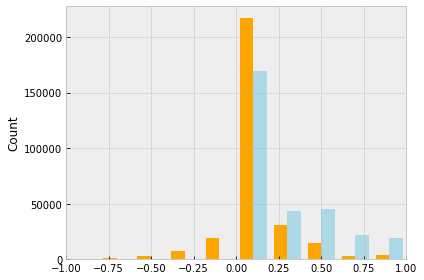

In [25]:
import numpy as np
import matplotlib.pyplot as plt

#makes the data
y1 = df1['Polarity']
y2 = df1['Subjectivity']
colors = ['Orange','Lightblue']

#plots the histogram
fig, ax1 = plt.subplots()
ax1.hist([y1,y2],color=colors)
ax1.set_xlim(-1,1)
ax1.set_ylabel("Count")
plt.tight_layout()
plt.show()

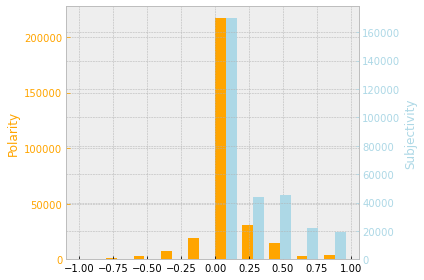

In [26]:
#sets up the axis and gets histogram data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist([y1, y2], color=colors)
n, bins, patches = ax1.hist([y1,y2])
ax1.cla() #clear the axis

#plots the histogram data
width = (bins[1] - bins[0]) * 0.4
bins_shifted = bins + width
ax1.bar(bins[:-1], n[0], width, align='edge', color=colors[0])
ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color=colors[1])

#finishes the plot
ax1.set_ylabel("Polarity", color=colors[0])
ax2.set_ylabel("Subjectivity", color=colors[1])
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
plt.tight_layout()
plt.show()

## Overall sentiment for Bitcoin in February:

In [27]:
avg_subjectivity = df1['Subjectivity'].mean(axis = 0)
avg_polarity = df1['Polarity'].mean(axis = 0)

print(avg_subjectivity)
print(avg_polarity)

0.237368820594673
0.0728298421056733


# Time series Analysis

In [28]:
import matplotlib.pyplot as plt

In [29]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

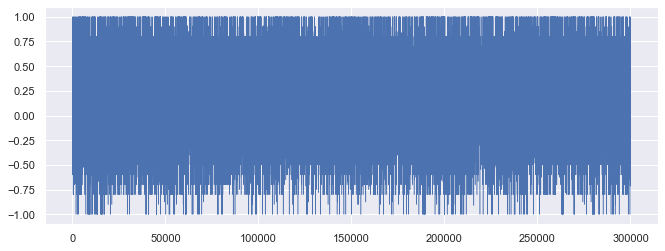

In [30]:
df1['Polarity'].plot(linewidth=0.5);

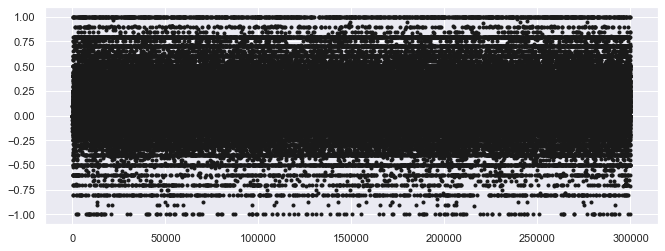

In [31]:
df1['Polarity'].plot(style='k.')
plt.show()

In [32]:
#In order to have a more clear idea we decided to group our tweets by hour, 
#considering as polarity and subjectivity the average
df1['date'] = pd.to_datetime(df1['date'])
hour_df1 = df1.set_index('date').groupby(pd.Grouper(freq='H')).mean()
#hour_df1 = hour_df1.reset_index()

In [33]:
hour_df1

,Tweet Id,replyCount,retweetCount,likeCount,quoteCount,Subjectivity,Polarity
date,,,,,,,
2021-02-20 01:00:00+00:00,1.362942e+18,0.461774,0.726300,4.640673,0.084098,0.232688,0.069914
2021-02-20 02:00:00+00:00,1.362952e+18,0.573881,1.313433,7.155970,0.087313,0.210278,0.061930
2021-02-20 03:00:00+00:00,1.362967e+18,0.579119,0.947798,6.982055,0.095432,0.246715,0.053603
2021-02-20 04:00:00+00:00,1.362983e+18,0.744755,1.435315,11.216783,0.109266,0.233553,0.074457
2021-02-20 05:00:00+00:00,1.362998e+18,0.469831,0.935640,6.314562,0.143202,0.219221,0.080007
...,...,...,...,...,...,...,...
2021-02-27 19:00:00+00:00,1.365746e+18,1.201915,1.536989,13.679721,0.127067,0.243474,0.079770
2021-02-27 20:00:00+00:00,1.365761e+18,1.259167,2.117500,14.910000,0.145833,0.221429,0.068923
2021-02-27 21:00:00+00:00,1.365775e+18,1.287184,1.503956,10.454114,0.179589,0.264904,0.073777


In [34]:
#import datetime as dt
#df1['date'] = pd.to_datetime(df1['date'])
#df1['date'] = df1['date'].apply(lambda x: dt.datetime.strftime(x,'%d-%m-%Y %H:%M:%S'))

In [35]:
#df1['date'] = pd.to_datetime(df1['date'])
#df1.dtypes

In [36]:
#df1['datehour'] = df1['date'].dt.hour
#df1['dateday'] = df1['date'].dt.date

In [37]:
#df1_hour = df1.groupby(['dateday','datehour'],as_index=False).agg({'Polarity': 'mean','Subjectivity': 'mean'})

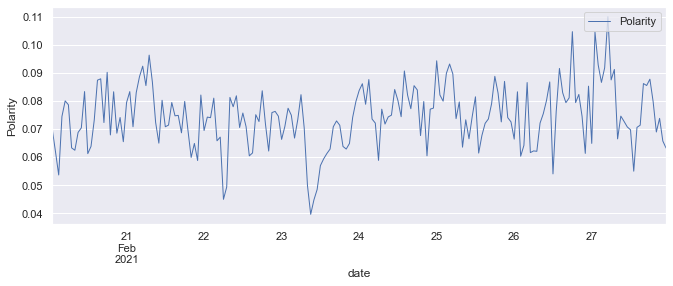

<Figure size 1440x1440 with 0 Axes>

In [38]:
from matplotlib import pyplot
series = hour_df1[['Polarity']]

series.plot(linewidth=1)
pyplot.xlabel("date")
pyplot.ylabel("Polarity")
pyplot.legend(loc="upper right")
pyplot.legend(loc="upper right")
plt.figure(figsize=(20,20))

#plt.hlines(y=0, xmin=-10, xmax=50, color="r")
#plt.ylim([-2,2])
#pyplot.show()
pyplot.show()
#hour_df1['Polarity'].plot(linewidth=0.5);

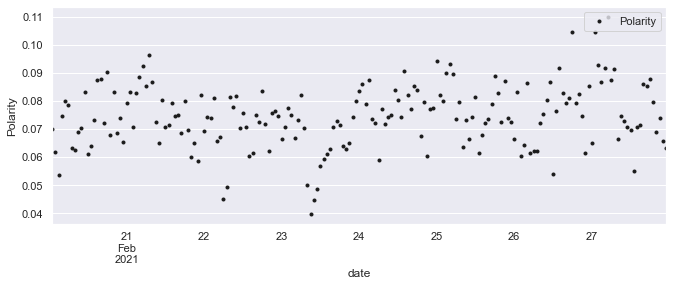

<Figure size 1440x1440 with 0 Axes>

In [39]:
series = hour_df1[['Polarity']]

series.plot(style='k.')
pyplot.xlabel("date")
pyplot.ylabel("Polarity")
pyplot.legend(loc="upper right")
pyplot.legend(loc="upper right")
plt.figure(figsize=(20,20))

#plt.hlines(y=0, xmin=-10, xmax=50, color="r")
#plt.ylim([-2,2])
#pyplot.show()
pyplot.show()
#hour_df1['Polarity'].plot(linewidth=0.5);

<AxesSubplot:xlabel='date'>

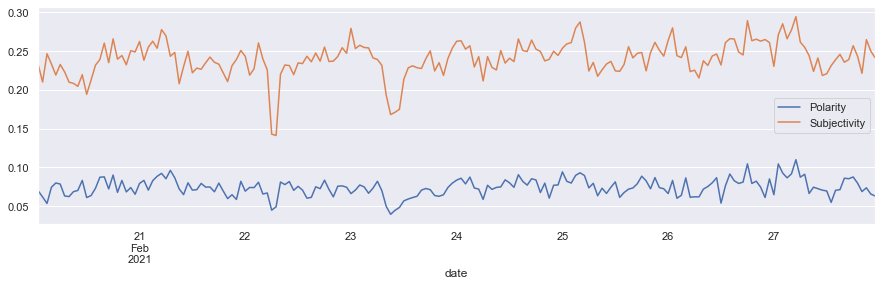

In [40]:
hour_df1.plot(y=["Polarity", "Subjectivity"], figsize=(15,4))
#df1_hour.plot(x="date", y=["Polarity", "Subjectivity"], style='.')

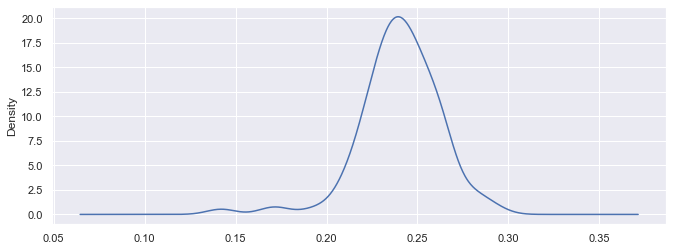

In [41]:
hour_df1['Subjectivity'].plot(kind='kde')
plt.show()

# Doge Coin Month Analysis

In [42]:
#We open the csv created before
dcj = pd.read_csv("doge_january.csv")
dcf = pd.read_csv("doge_february.csv")
dca = pd.read_csv("doge_april.csv")
dcm = pd.read_csv("doge_may.csv")

In [43]:
#cleaning
dcj

,Datetime,Tweet Id,Text,Username
0,2021-01-29 23:59:59+00:00,1355304717434413056,#fridaymorning\n#WandaVision \n#dogecoin\n#thu...,inyourenergy
1,2021-01-29 23:59:59+00:00,1355304716570218500,The craziest experiences of my life. A discord...,hufflesie
2,2021-01-29 23:59:54+00:00,1355304695376596992,@tyler Use Huobi to buy #DOGE! Retweet! #Dogec...,Steve_cook__
3,2021-01-29 23:59:54+00:00,1355304695036841991,@elonmusk how many retweets for #dogecoin to b...,scoopmagee
4,2021-01-29 23:59:52+00:00,1355304687625523201,When #dogecoin gets to $10 I will get 3 more d...,sinnerhella
...,...,...,...,...
299996,2021-01-02 05:33:06+00:00,1345241688709578752,6k more worth of #dogecoin pumping to a Penny!,LemurianSquirr1
299997,2021-01-02 05:33:06+00:00,1345241688092987399,#dogecoin https://t.co/7EYNXhteOf,Justa_buster
299998,2021-01-02 05:33:05+00:00,1345241685429727232,$DOGE 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀 #do...,TheStevoCat
299999,2021-01-02 05:33:04+00:00,1345241679046049793,Wait... what’s a $Doge? Is it like #TheBest? #...,AfferDark8


In [44]:
dcj.rename(columns={'Text': 'Tweet'}, inplace=True)
dcf.rename(columns={'Text': 'Tweet'}, inplace=True)
dca.rename(columns={'Text': 'Tweet'}, inplace=True)
dcm.rename(columns={'Text': 'Tweet'}, inplace=True)
df1

,date,Tweet,Tweet Id,replyCount,retweetCount,likeCount,quoteCount,Subjectivity,Polarity,Sentiment
0,2021-02-27 23:59:51+00:00,i just join this crypto giveaway by jrnycrypto...,1365813931915177984,0,0,0,0,0.300000,0.100000,Positive
1,2021-02-27 23:59:50+00:00,in this optimal portfolio and in the past hour...,1365813927179862028,0,0,0,0,0.187500,-0.125000,Negative
2,2021-02-27 23:59:36+00:00,bitcoin either go up or down from here,1365813867729678336,8,1,30,1,0.288889,-0.155556,Negative
3,2021-02-27 23:59:34+00:00,i just join this crypto giveaway by jrnycrypto...,1365813861711040515,0,0,0,0,0.300000,0.100000,Positive
4,2021-02-27 23:59:34+00:00,let go hive 🚀🚀🚀bitcoin decentralise money dece...,1365813858376499201,0,2,4,0,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...
299995,2021-02-20 01:33:37+00:00,minning güvenilir hızlı ücretsiz tıkla katıl o...,1362938423695278081,0,0,1,0,0.000000,0.000000,Neutral
299996,2021-02-20 01:33:32+00:00,ethbtc pair not look great need to hold this o...,1362938402895667201,0,0,0,0,0.625000,0.650000,Positive
299997,2021-02-20 01:33:31+00:00,peterschiff elonmusk stop shill bitcoin please,1362938402409115655,0,0,0,0,0.000000,0.000000,Neutral
299998,2021-02-20 01:33:29+00:00,bitcoin,1362938393689133057,0,0,0,0,0.000000,0.000000,Neutral


In [45]:
# Clean the tweets
dcj['Tweet'] = dcj['Tweet'].apply(cleanTwt)
dcf['Tweet'] = dcf['Tweet'].apply(cleanTwt)
dca['Tweet'] = dca['Tweet'].apply(cleanTwt)
dcm['Tweet'] = dcm['Tweet'].apply(cleanTwt)
# Perform lemmatization to the tweets
dcj['Tweet'] = dcj['Tweet'].apply(lemmatize_tag)
dcf['Tweet'] = dcf['Tweet'].apply(lemmatize_tag)
dca['Tweet'] = dca['Tweet'].apply(lemmatize_tag)
dcm['Tweet'] = dcm['Tweet'].apply(lemmatize_tag)

# Sentiment analysis

In [46]:
#create two new columns: subjectivity and polarity 
dcj['Subjectivity'] = dcj['Tweet'].apply(getSubjectivity)
dcj['Polarity'] = dcj['Tweet'].apply(getPolarity)
dcf['Subjectivity'] = dcf['Tweet'].apply(getSubjectivity)
dcf['Polarity'] = dcf['Tweet'].apply(getPolarity)
dca['Subjectivity'] = dca['Tweet'].apply(getSubjectivity)
dca['Polarity'] = dca['Tweet'].apply(getPolarity)
dcm['Subjectivity'] = dcm['Tweet'].apply(getSubjectivity)
dcm['Polarity'] = dcm['Tweet'].apply(getPolarity)
# Create a column to store the text sentiment
dcj['Sentiment'] = dcj['Polarity'].apply(getSentiment)
dcf['Sentiment'] = dcf['Polarity'].apply(getSentiment)
dca['Sentiment'] = dca['Polarity'].apply(getSentiment)
dcm['Sentiment'] = dcm['Polarity'].apply(getSentiment)

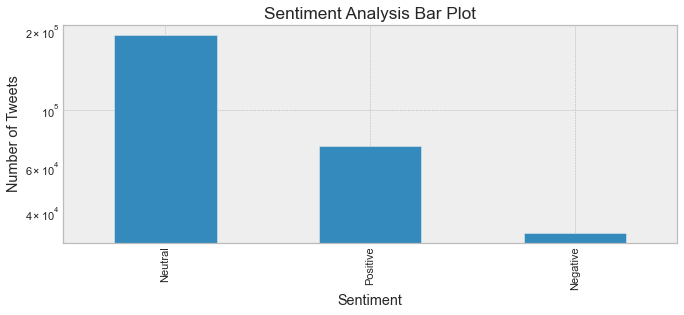

In [47]:
# Create a bar chart to show the count of positive, neutral and negative sentiments
plt.style.use(['bmh'])
from matplotlib.ticker import FuncFormatter

dcj['Sentiment'].value_counts().plot(kind='bar',logy=True)
#dcf['Sentiment'].value_counts().plot(kind='bar')
#dca['Sentiment'].value_counts().plot(kind='bar')
#dcm['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [48]:
dcj

,Datetime,Tweet Id,Tweet,Username,Subjectivity,Polarity,Sentiment
0,2021-01-29 23:59:59+00:00,1355304717434413056,bitcoin,inyourenergy,0.000000,0.000000,Neutral
1,2021-01-29 23:59:59+00:00,1355304716570218500,the crazy experience of my life a discord with...,hufflesie,0.450000,-0.300000,Negative
2,2021-01-29 23:59:54+00:00,1355304695376596992,tyler use huobi to buy retweet,Steve_cook__,0.000000,0.000000,Neutral
3,2021-01-29 23:59:54+00:00,1355304695036841991,elonmusk how many retweets for to be the offic...,scoopmagee,0.500000,0.500000,Positive
4,2021-01-29 23:59:52+00:00,1355304687625523201,when get to i will get more dog 🐕,sinnerhella,0.500000,0.500000,Positive
...,...,...,...,...,...,...,...
299996,2021-01-02 05:33:06+00:00,1345241688709578752,more worth of pump to a penny,LemurianSquirr1,0.300000,0.400000,Positive
299997,2021-01-02 05:33:06+00:00,1345241688092987399,,Justa_buster,0.000000,0.000000,Neutral
299998,2021-01-02 05:33:05+00:00,1345241685429727232,doge 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀 pump...,TheStevoCat,0.000000,0.000000,Neutral
299999,2021-01-02 05:33:04+00:00,1345241679046049793,wait whats a doge be it like be strong be real...,AfferDark8,0.386111,0.211111,Positive


# Comparison

In [49]:
dcj['Datetime'] = pd.to_datetime(dcj['Datetime'])
dcf['Datetime'] = pd.to_datetime(dcf['Datetime'])
dca['Datetime'] = pd.to_datetime(dca['Datetime'])
dcm['Datetime'] = pd.to_datetime(dcm['Datetime'])

In [50]:
dca.dtypes

Datetime        datetime64[ns, UTC]
Tweet Id                      int64
Tweet                        object
Username                     object
Subjectivity                float64
Polarity                    float64
Sentiment                    object
dtype: object

In [51]:
dcj['datemonth'] = dcj['Datetime'].dt.month
dcf['datemonth'] = dcf['Datetime'].dt.month
dca['datemonth'] = dca['Datetime'].dt.month
dcm['datemonth'] = dcm['Datetime'].dt.month

In [52]:
dcm

,Datetime,Tweet Id,Tweet,Username,Subjectivity,Polarity,Sentiment,datemonth
0,2021-05-10 23:59:57+00:00,1391905881818816513,binance shibtoken be you afraid of take over t...,DimitrisDamian4,0.450000,-0.300000,Negative,5
1,2021-05-10 23:59:56+00:00,1391905876861145088,,Dogecoin_or_die,0.000000,0.000000,Neutral,5
2,2021-05-10 23:59:52+00:00,1391905863288467463,let take them to the moon🚀🌑,Dreamer8510,0.000000,0.000000,Neutral,5
3,2021-05-10 23:59:52+00:00,1391905861153533959,risermaker binance czbinance hes a scammer 💯 b...,DoOnlyGudEvrday,0.266667,-0.066667,Negative,5
4,2021-05-10 23:59:51+00:00,1391905859798638592,the top cryptos year ago,adamtcooke,0.500000,0.500000,Positive,5
...,...,...,...,...,...,...,...,...
177088,2021-05-07 00:00:05+00:00,1390456363948650500,troncloud mining website withdrawal available ...,crypthunterr,0.300000,0.300000,Positive,5
177089,2021-05-07 00:00:04+00:00,1390456359016144904,get unlimited dogecoin in your wallet,huggins_shari,0.000000,0.000000,Neutral,5
177090,2021-05-07 00:00:02+00:00,1390456353760501760,doge nft audio archive gold edition 🌕🚀only on ...,Drasko_V,0.000000,0.000000,Neutral,5
177091,2021-05-07 00:00:02+00:00,1390456350459707397,i have a small voice here on twitterbut that d...,DogeFalata,0.472727,-0.011364,Negative,5


In [53]:
df_jf = dcj.append(dcf, ignore_index = True)
df_jfa = df_jf.append(dca, ignore_index = True)
df_jfam = df_jfa.append(dcm, ignore_index = True)

In [54]:
df_jfam

,Datetime,Tweet Id,Tweet,Username,Subjectivity,Polarity,Sentiment,datemonth
0,2021-01-29 23:59:59+00:00,1355304717434413056,bitcoin,inyourenergy,0.000000,0.000000,Neutral,1
1,2021-01-29 23:59:59+00:00,1355304716570218500,the crazy experience of my life a discord with...,hufflesie,0.450000,-0.300000,Negative,1
2,2021-01-29 23:59:54+00:00,1355304695376596992,tyler use huobi to buy retweet,Steve_cook__,0.000000,0.000000,Neutral,1
3,2021-01-29 23:59:54+00:00,1355304695036841991,elonmusk how many retweets for to be the offic...,scoopmagee,0.500000,0.500000,Positive,1
4,2021-01-29 23:59:52+00:00,1355304687625523201,when get to i will get more dog 🐕,sinnerhella,0.500000,0.500000,Positive,1
...,...,...,...,...,...,...,...,...
1077091,2021-05-07 00:00:05+00:00,1390456363948650500,troncloud mining website withdrawal available ...,crypthunterr,0.300000,0.300000,Positive,5
1077092,2021-05-07 00:00:04+00:00,1390456359016144904,get unlimited dogecoin in your wallet,huggins_shari,0.000000,0.000000,Neutral,5
1077093,2021-05-07 00:00:02+00:00,1390456353760501760,doge nft audio archive gold edition 🌕🚀only on ...,Drasko_V,0.000000,0.000000,Neutral,5
1077094,2021-05-07 00:00:02+00:00,1390456350459707397,i have a small voice here on twitterbut that d...,DogeFalata,0.472727,-0.011364,Negative,5


<AxesSubplot:xlabel='Sentiment'>

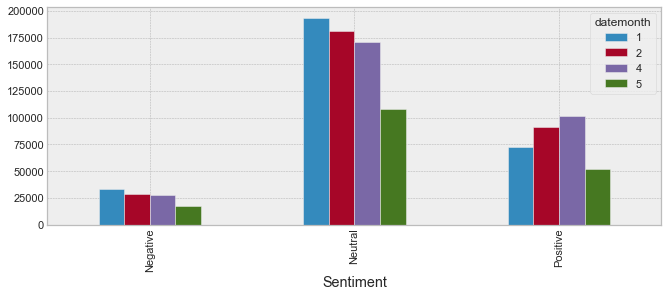

In [55]:
df_jfam.groupby(['Sentiment', 'datemonth']).size().unstack().plot.bar(legend=True)


<AxesSubplot:xlabel='Sentiment'>

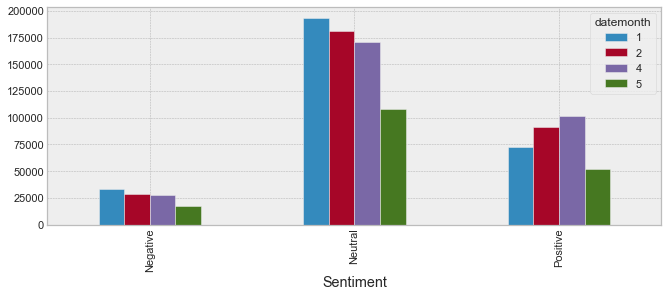

In [56]:
pd.crosstab(df_jfam['Sentiment'],df_jfam['datemonth']).plot.bar()

In [57]:
comparison = df_jfam.groupby(['datemonth','Sentiment'],as_index=False).agg({'Polarity': 'mean','Subjectivity': 'mean'})

In [58]:
comparison

,datemonth,Sentiment,Polarity,Subjectivity
0,1,Negative,-0.281324,0.574450
1,1,Neutral,0.000000,0.023851
2,1,Positive,0.337738,0.556716
3,2,Negative,-0.229026,0.541309
4,2,Neutral,0.000000,0.030785
5,2,Positive,0.341155,0.546321
6,4,Negative,-0.199452,0.502229
7,4,Neutral,0.000000,0.035966
8,4,Positive,0.298320,0.507197
9,5,Negative,-0.229400,0.535954


# Analysis Doge May (Elon Musk)

In [59]:
dcm

,Datetime,Tweet Id,Tweet,Username,Subjectivity,Polarity,Sentiment,datemonth
0,2021-05-10 23:59:57+00:00,1391905881818816513,binance shibtoken be you afraid of take over t...,DimitrisDamian4,0.450000,-0.300000,Negative,5
1,2021-05-10 23:59:56+00:00,1391905876861145088,,Dogecoin_or_die,0.000000,0.000000,Neutral,5
2,2021-05-10 23:59:52+00:00,1391905863288467463,let take them to the moon🚀🌑,Dreamer8510,0.000000,0.000000,Neutral,5
3,2021-05-10 23:59:52+00:00,1391905861153533959,risermaker binance czbinance hes a scammer 💯 b...,DoOnlyGudEvrday,0.266667,-0.066667,Negative,5
4,2021-05-10 23:59:51+00:00,1391905859798638592,the top cryptos year ago,adamtcooke,0.500000,0.500000,Positive,5
...,...,...,...,...,...,...,...,...
177088,2021-05-07 00:00:05+00:00,1390456363948650500,troncloud mining website withdrawal available ...,crypthunterr,0.300000,0.300000,Positive,5
177089,2021-05-07 00:00:04+00:00,1390456359016144904,get unlimited dogecoin in your wallet,huggins_shari,0.000000,0.000000,Neutral,5
177090,2021-05-07 00:00:02+00:00,1390456353760501760,doge nft audio archive gold edition 🌕🚀only on ...,Drasko_V,0.000000,0.000000,Neutral,5
177091,2021-05-07 00:00:02+00:00,1390456350459707397,i have a small voice here on twitterbut that d...,DogeFalata,0.472727,-0.011364,Negative,5


In [60]:
hour_df_may = dcm.set_index('Datetime').groupby(pd.Grouper(freq='H')).mean()

In [61]:
hour_df_may

,Tweet Id,Subjectivity,Polarity,datemonth
Datetime,,,,
2021-05-07 00:00:00+00:00,1390464214048684544,0.270250,0.127610,5
2021-05-07 01:00:00+00:00,1390479060051898880,0.259587,0.104148,5
2021-05-07 02:00:00+00:00,1390493717193989120,0.280569,0.114605,5
2021-05-07 03:00:00+00:00,1390508716280982528,0.250681,0.095704,5
2021-05-07 04:00:00+00:00,1390524863858002944,0.234865,0.093738,5
...,...,...,...,...
2021-05-10 19:00:00+00:00,1391838556665858816,0.247856,0.077098,5
2021-05-10 20:00:00+00:00,1391852643935853568,0.249170,0.075354,5
2021-05-10 21:00:00+00:00,1391868485322094592,0.237522,0.073665,5


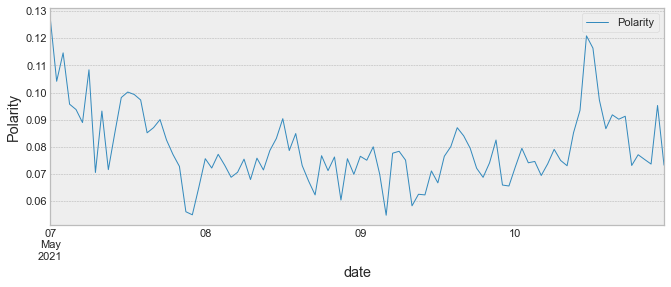

<Figure size 1440x1440 with 0 Axes>

In [62]:
from matplotlib import pyplot
series = hour_df_may[['Polarity']]

series.plot(linewidth=1)
pyplot.xlabel("date")
pyplot.ylabel("Polarity")
pyplot.legend(loc="upper right")
pyplot.legend(loc="upper right")
plt.figure(figsize=(20,20))

#plt.hlines(y=0, xmin=-10, xmax=50, color="r")
#plt.ylim([-2,2])
#pyplot.show()
pyplot.show()
#hour_df1['Polarity'].plot(linewidth=0.5);

<AxesSubplot:xlabel='Datetime'>

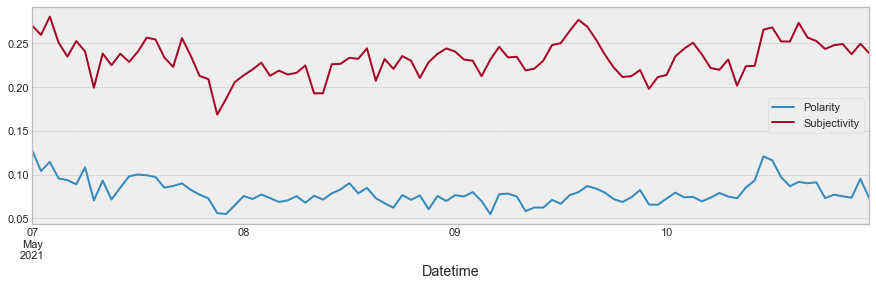

In [63]:
hour_df_may.plot(y=["Polarity", "Subjectivity"], figsize=(15,4))
#df1_hour.plot(x="date", y=["Polarity", "Subjectivity"], style='.')

# Wordcloud

In [64]:
# Create a new df composed only by the text of the tweets grouped by their sentiments
sentiment_may = dcm.groupby('Sentiment')['Tweet'].apply(' '.join).reset_index()
sentiment_may = sentiment_may.set_index('Sentiment')

In [65]:
sentiment_may

,Tweet
Sentiment,
Negative,binance shibtoken be you afraid of take over t...
Neutral,let take them to the moon🚀🌑 the current value...
Positive,the top cryptos year ago and the magnificent r...


In [66]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(sentiment_may.Tweet)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = sentiment_may.index
data_dtm

,aa,aaa,aaaa,aaaaa,aaaaaaaaaaaaarrrrrrrrrrrrreeeeeeeee,aaaaaaaaaand,aaaaaaaahahahahahahahahahahahaha,aaaaaaaahhhhh,aaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuu,aaaaaand,...,𝚙𝚊𝚜𝚜𝚎𝚍,𝚝𝚊𝚔𝚎,𝚝𝚑𝚒𝚗𝚐𝚜,𝚝𝚑𝚒𝚜,𝚝𝚘,𝚞𝚗𝚝𝚒𝚕,𝚞𝚙,𝚞𝚜𝚎,𝚟𝚊𝚕𝚒𝚍,𝚠𝚒𝚝𝚑
Sentiment,,,,,,,,,,,,,,,,,,,,,
Negative,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Neutral,5,3,2,1,1,0,1,1,1,2,...,0,1,1,1,2,0,1,0,0,2
Positive,2,2,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [67]:
data_dtm[['elon']]

,elon
Sentiment,
Negative,775
Neutral,3527
Positive,2289


In [68]:
data_dtm[['fake']]

,fake
Sentiment,
Negative,182
Neutral,13
Positive,42


In [69]:
data_dtm[['musk']]

,musk
Sentiment,
Negative,458
Neutral,2284
Positive,1325


In [70]:
# Find the top 30 words for each perceived sentiment [negative/neutral/positive]
data=data_dtm.transpose()

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Negative': [('doge', 4030),
  ('wallet', 2340),
  ('unknown', 2219),
  ('elonmusk', 2085),
  ('buy', 1788),
  ('people', 1580),
  ('just', 1567),
  ('sell', 1486),
  ('dont', 1435),
  ('bitcoin', 1245),
  ('price', 1217),
  ('usd', 1198),
  ('like', 1169),
  ('date', 1168),
  ('symbol', 1147),
  ('gmt', 1144),
  ('dogecoin', 1113),
  ('fuck', 1051),
  ('im', 1002),
  ('make', 994),
  ('coin', 916),
  ('say', 886),
  ('time', 872),
  ('moon', 862),
  ('crypto', 820),
  ('let', 792),
  ('hold', 791),
  ('elon', 775),
  ('long', 768),
  ('think', 760)],
 'Neutral': [('doge', 13824),
  ('elonmusk', 13010),
  ('bitcoin', 10735),
  ('moon', 6284),
  ('dogecoin', 6018),
  ('buy', 5796),
  ('elon', 3527),
  ('let', 3104),
  ('sell', 2913),
  ('just', 2853),
  ('check', 2531),
  ('dip', 2397),
  ('hold', 2372),
  ('crypto', 2356),
  ('musk', 2284),
  ('dont', 2251),
  ('like', 2240),
  ('snl', 2196),
  ('coin', 2058),
  ('people', 2001),
  ('make', 1767),
  ('say', 1704),
  ('day', 1629),
  (

In [71]:
# Print the top 30 words said following the sentiment division
for sentiment, top_words in top_dict.items():
    print(sentiment)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

Negative
doge, wallet, unknown, elonmusk, buy, people, just, sell, dont, bitcoin, price, usd, like, date, symbol, gmt, dogecoin, fuck, im, make, coin, say, time, moon, crypto, let, hold, elon, long, think
---
Neutral
doge, elonmusk, bitcoin, moon, dogecoin, buy, elon, let, sell, just, check, dip, hold, crypto, musk, dont, like, snl, coin, people, make, say, day, im, time, website, la, hit, en, spacex
---
Positive
doge, elonmusk, buy, bitcoin, good, just, people, dogecoin, make, time, sell, dont, new, like, coin, moon, im, love, crypto, right, elon, free, day, dip, let, great, think, price, hold, snl
---


In [72]:
x = data.sort_values(by=['Positive','Neutral','Negative'], ascending=True)

data_top5_negative = x['Negative'].tail(5)

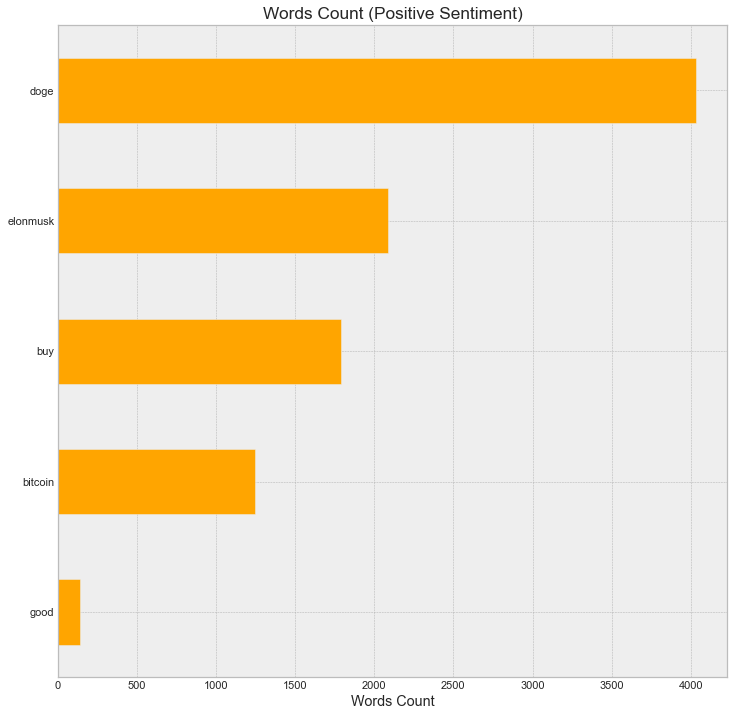

In [161]:
data_top5_negative.plot(kind='barh', figsize=(12, 12), color='Orange')
plt.xlabel('Words Count')
plt.title('Words Count (Negative Sentiment)')

# annotate value labels to each country
for index, value in enumerate(data_top5_positive): 
    label = format(int(value), ',') # format int with commas

plt.show()

## wordcloud

In [158]:
from wordcloud import WordCloud
from PIL import Image

doge_image = np.array(Image.open("doge.jpeg"))
wc = WordCloud(collocations=False,mask=doge_image, background_color="black", colormap="Dark2",
              max_font_size=400, random_state=42)

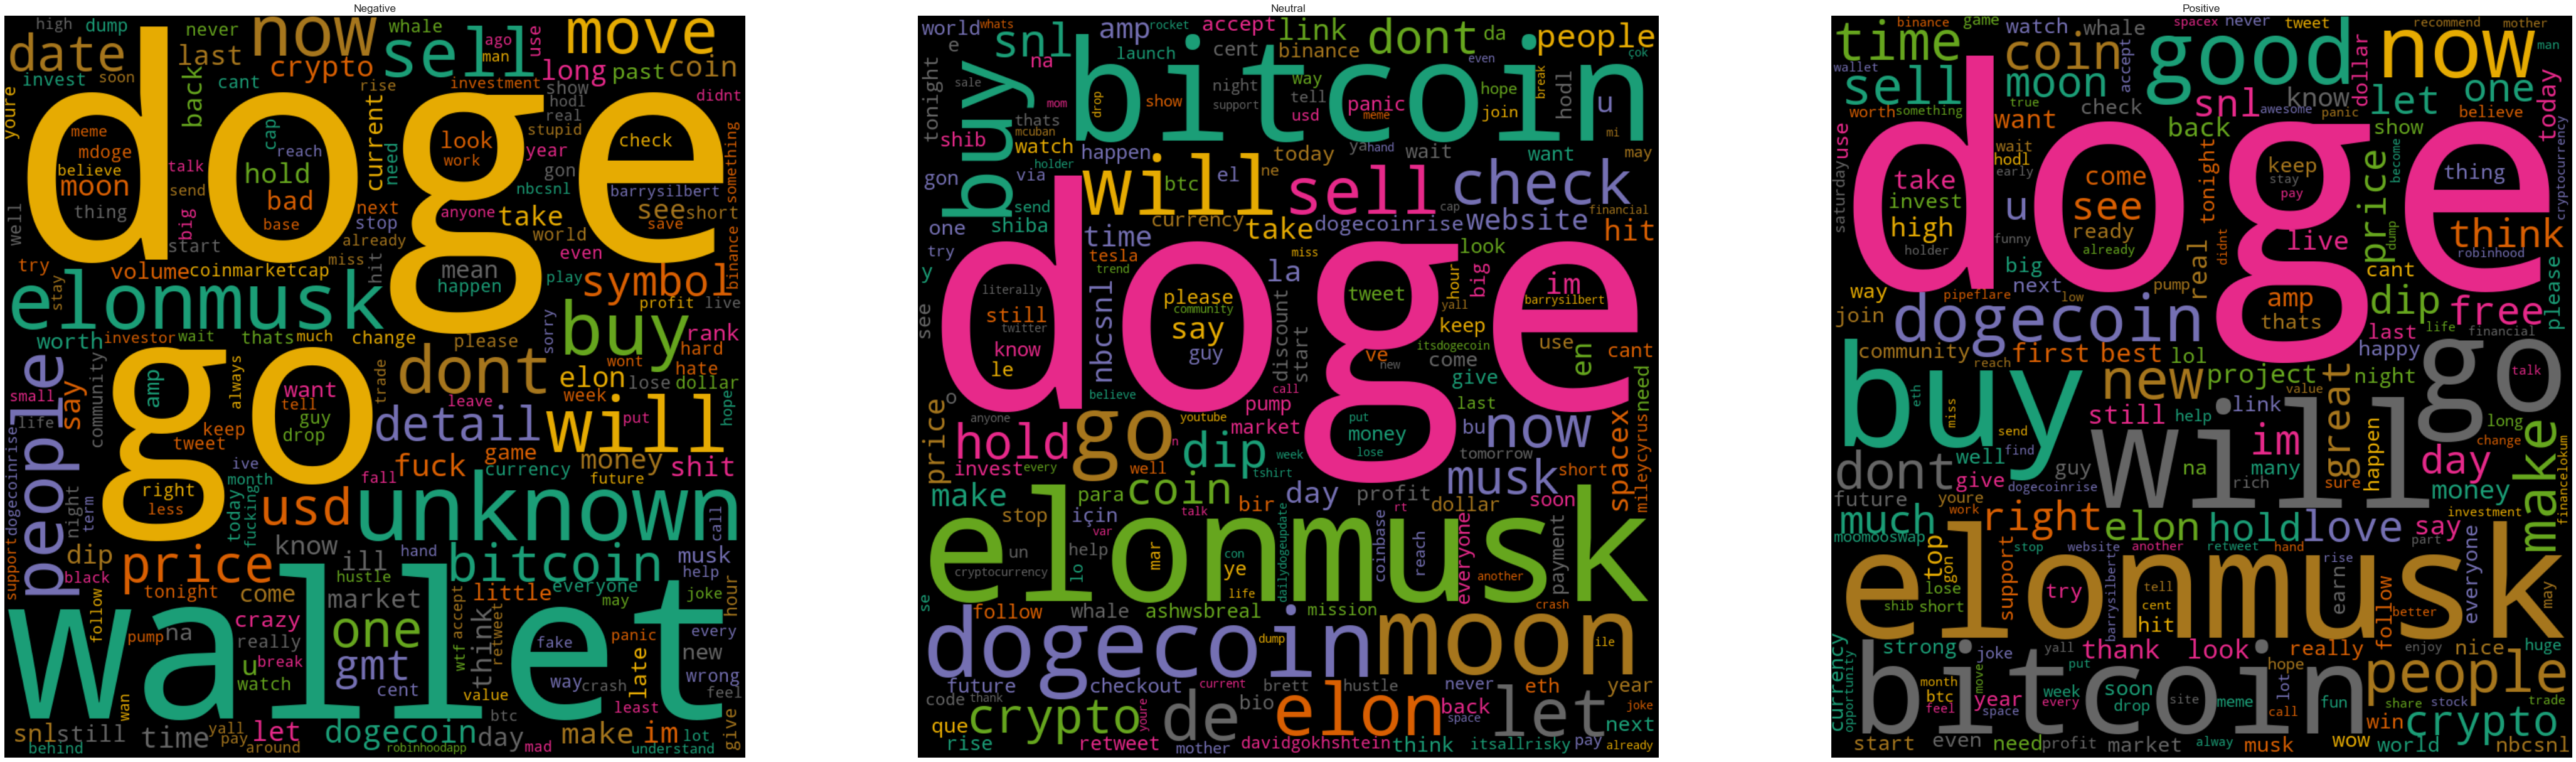

In [159]:
plt.rcParams['figure.figsize'] = [100,100]

# Create subplots for each comedian
for index, sentiment in enumerate(data.columns):
    wc.generate(sentiment_may.Tweet[sentiment])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data.columns[index])
    
plt.show()

The presence of the word elon musk is huge